In [88]:
import pandas as pd
import numpy as np
import dill
import bokeh
import math
from datetime import date
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.corpora import MmCorpus
from gensim.similarities import Similarity

import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings("ignore")

from bokeh.models import ColumnDataSource
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure,show,output_notebook
from bokeh.models import LogColorMapper, LogTicker, ColorBar,PrintfTickFormatter
pd.options.mode.chained_assignment = None 
output_notebook()

Loading BokehJS ...

# Wiser | 兼听

This APP is developed on the idea that if you listen to both sides of any given tipic, you are more likely to get a comprehensive look on it. The mentality perfectly coins a proverb in Chinese saying that one becomes wiser listening to both sides (兼听则明). This project, to the core is an elevated News recomender system based on topic modeling and opinion mining. Any topic you start with, we will recommend you three ariticles that's positive about it and three articles that are negative about it. And after reading each article, we will again list three similar articles, and also three articles with opposite view. They say that America right now is severely divided, hopefully this APP is a small step towards building a middle ground.

In [2]:
all_news = dill.load(open('../data/article_set', 'rb'))

## Visualize the number of publications from each agency

In [11]:
news_agency=all_news.groupby('publication').agg('count').reset_index().sort_values('id')

In [12]:
news_agencies = list(news_agency['publication'].values)
counts = list(news_agency['id'].values)

source = ColumnDataSource(data=dict(agencies=news_agencies, counts=counts))

p = figure(y_range=news_agencies, plot_height=600, plot_width=900, x_range=(0, 25000))
p.hbar(y='agencies', height=0.7, right='counts',source=source,color='#e84d60',alpha=0.6)

p.xgrid.grid_line_color = None

show(p)

## Visualize Topics

In [73]:
model =  LdaModel.load('../data/lda_entireset.model')
dictionary = Dictionary.load_from_text('../data/dictionary')
corpus=MmCorpus('../data/corpus.mm')

In [74]:
pyLDAvis.gensim.prepare(model, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
36     0.198404 -0.146729       1        1  6.992010
46     0.190349 -0.018588       2        1  6.018990
39     0.017821 -0.136770       3        1  5.750314
20     0.135170 -0.003340       4        1  4.958549
2      0.159557  0.019415       5        1  4.299420
18     0.125273  0.154780       6        1  3.719100
45     0.212480 -0.114803       7        1  3.513467
38     0.150682  0.164341       8        1  3.422542
35     0.157976 -0.013901       9        1  3.248271
32     0.058315 -0.221927      10        1  3.003588
27     0.020195  0.141789      11        1  2.614275
19     0.106499  0.006658      12        1  2.521675
34     0.108174  0.149624      13        1  2.471483
30     0.181015 -0.102916      14        1  2.331688
37    -0.052662 -0.014945      15        1  2.299500
44     0.085210  0.027868      16        1  2.277167
29     0.005692  0.131120      17        1  2.204750
8      0.022067  0.150645      18        1  2.028785
10    -0.046031  0.120948      19        1  2.004843
31     0.038181 -0.185345      20        1  1.919716
0      0.132990  0.073867      21        1  1.893630
7      0.036691 -0.096119      22        1  1.791113
21    -0.046858  0.082648      23        1  1.651435
49    -0.165842  0.072439      24        1  1.629606
28    -0.085167  0.073348      25        1  1.427149
11     0.067856  0.074262      26        1  1.408258
22    -0.014535 -0.114986      27        1  1.358179
16     0.105432  0.061046      28        1  1.336072
48    -0.173379 -0.018975      29        1  1.288918
24    -0.045116  0.021373      30        1  1.276894
23    -0.047287 -0.071465      31        1  1.275000
3     -0.088216  0.032614      32        1  1.227177
15    -0.016740  0.039792      33        1  1.205386
12    -0.008655 -0.149214      34        1  1.162134
26    -0.053954  0.075007      35        1  1.079081
41    -0.009444 -0.005917      36        1  1.073309
25    -0.154984 -0.031944      37        1  0.995347
43     0.024353 -0.038422      38        1  0.981337
1     -0.019446  0.133734      39        1  0.952801
17    -0.069382 -0.159520      40        1  0.930948
47    -0.147666  0.056640      41        1  0.907002
4     -0.201966  0.033495      42        1  0.864173
14    -0.085464  0.104693      43        1  0.780479
40    -0.093335 -0.041425      44        1  0.733641
42    -0.091366  0.089476      45        1  0.646325
13    -0.109303 -0.135966      46        1  0.575075
5     -0.114444  0.059800      47        1  0.552432
6     -0.128787 -0.172503      48        1  0.527364
9     -0.141185 -0.073677      49        1  0.472140
33    -0.129172 -0.082026      50        1  0.397466, topic_info=       Category           Freq                 Term          Total  loglift  \
term                                                                          
179043  Default  103681.000000                woman  103681.000000  30.0000   
31931   Default   69345.000000              company   69345.000000  29.0000   
29605   Default   74699.000000              clinton   74699.000000  28.0000   
135882  Default   72952.000000           republican   72952.000000  27.0000   
122422  Default   44649.000000               police   44649.000000  26.0000   
16868   Default   29480.000000                black   29480.000000  25.0000   
10684   Default   41028.000000               attack   41028.000000  24.0000   
27554   Default   27201.000000                china   27201.000000  23.0000   
107430  Default   22937.000000               muslim   22937.000000  22.0000   
41824   Default   43087.000000             democrat   43087.000000  21.0000   
27423   Default   52333.000000                child   52333.000000  20.0000   
142803  Default   34182.000000               school   34182.000000  19.0000   
140421  Default   32134.000000               russia   32134.000000  18.0000   
177316  Default 

## Heat Map of the Topics

In [13]:
all_news_hm = all_news.groupby(['publication','topic']).agg('count').reset_index()

In [14]:
df = all_news_hm[['publication','topic','id']]
df = df.sort_values('id').set_index(['publication','topic']).reset_index()
total_art=news_agency[['publication','id']].set_index('publication').to_dict()

# find the percentage of each topic for indivisual agencies
def get_percent(row):
    total=total_art['id'][row['publication']]
    return float(row['id']/total)*100
df['percent']=df.apply(lambda row: get_percent(row),axis=1)
df['lg_percent']=np.log2(df['percent'])

pubs= list(df['publication'].unique())
topic= list(df['topic'].unique())

colors =list(reversed(['#b2182b','#d6604d','#f4a582','#fddbc7','#f7f7f7','#d1e5f0','#92c5de','#4393c3','#2166ac']))
mapper = LogColorMapper(palette=colors, low=df.percent.min(), high=df.percent.max())
TOOLS = "hover,save,pan,box_zoom,reset,wheel_zoom"

p = figure(x_range=pubs, y_range=topic,
           x_axis_location="above", plot_width=900, plot_height=900,
           tools=TOOLS, toolbar_location='below',
           tooltips=[('publication', '@publication'), ('topic','@topic'),('of Articles', '@percent%')])

p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "10pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = math.pi / 3

p.rect(x="publication", y="topic", width=1, height=1,
       source=df,
       fill_color={'field': 'percent', 'transform': mapper},
       alpha=0.9,
       line_color=None)

color_bar = ColorBar(color_mapper=mapper, major_label_text_font_size="10pt",
                     ticker=LogTicker(),
                     formatter=PrintfTickFormatter(format="%d%%"),
                     label_standoff=6, border_line_color=None, location=(0, 0))
p.add_layout(color_bar, 'right')

show(p)      # show the plot

## Build the Sentiment Analysis Model

Here, we'll implement a model using PyTorch from the paper [Bag of Tricks for Efficient Text Classification](https://arxiv.org/abs/1607.01759).

This model first calculates the word embedding for each word using the `Embedding` layer, then calculates the average of all of the word embeddings and feeds this through the `Linear` layer, and that's it!

![](https://i.imgur.com/e0sWZoZ.png)

We implement the averaging with the `avg_pool2d` (average pool 2-dimensions) function. Initially, you may think using a 2-dimensional pooling seems strange, surely our sentences are 1-dimensional, not 2-dimensional? However, you can think of the word embeddings as a 2-dimensional grid, where the ones are along one axis and the dimensions of the word embeddings are along another. In the image below is an example sentence after being converted into 5-dimensional word embeddings, with the words along the vertical axis and the embeddings along the horizontal axis.

![](https://i.imgur.com/SSH25NT.png)

The `avg_pool2d` passes a filter of size `embedded.shape[1]` (i.e. the length of the sentence) by 1. This is shown in pink in the image below.

![](https://i.imgur.com/U7eRnIe.png)

The average value of all of the dimensions is calculated and concatenated into a 5-dimensional (in our pictoral examples, 100-dimensional in the code) tensor for each sentence. This tensor is then passed through the linear layer to produce our prediction.

## Visualize the sentiment for different topics

In [15]:
df=all_news[['publication','date','topic','sentiment']]

#find all the topics that are going to be plotted
topic_list=['Politics/Election','Crime','Foreign Policy','Education','Russia Investigation','Immigration',
            'Economy','Terrorism','Health Care']

#find all the poblication that is going to be compared
pub_list=['New York Times','Reuters','Washington Post','CNN','New York Post','Breitbart']

df=df[df['publication'].isin(pub_list)]
df=df[df['topic'].isin(topic_list)]

### For Politics/Election

[Text(0,0.5,'Sentiment Scores'), Text(0.5,0,'Publications')]

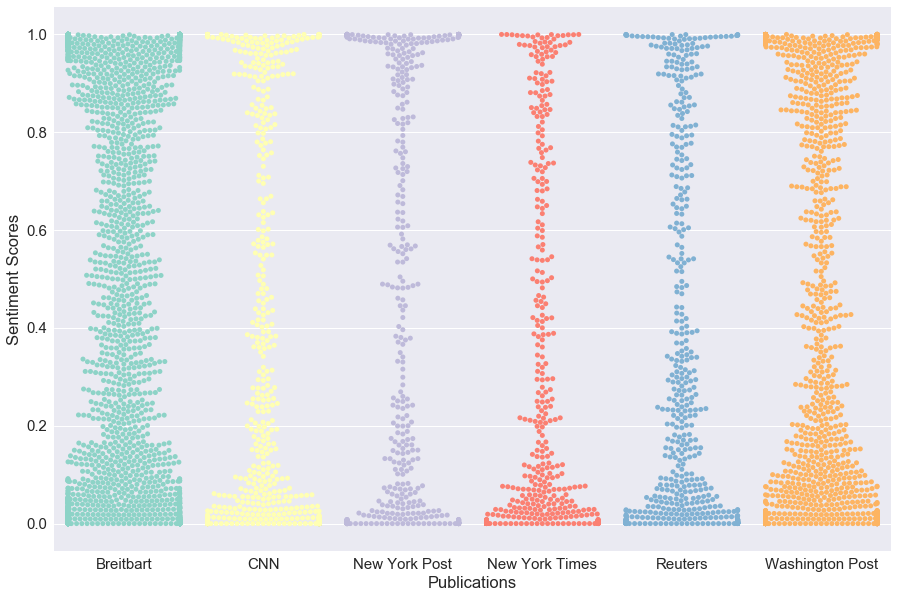

In [66]:
sns.set_context("notebook",font_scale=1.5)
df_pe=df[df['topic']=='Politics/Election']
df_pe=df_pe.sort_values('publication')
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.swarmplot(x="publication", y="sentiment", data=df_pe, palette="Set3")
ax.set(xlabel='Publications', ylabel='Sentiment Scores')

### Factor plot for all selected topics

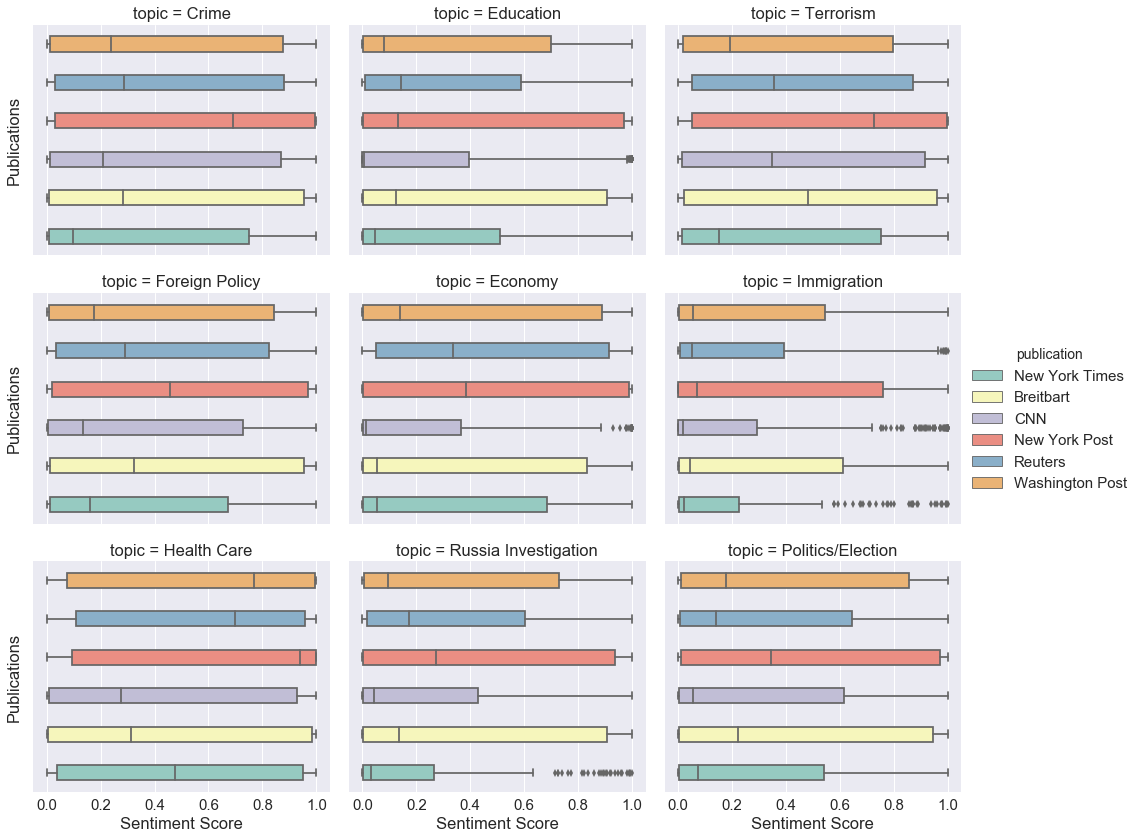

In [81]:
sns.set_style("darkgrid")
sns.set_context("notebook",font_scale=1.5)
g = sns.factorplot(y="publication", x="sentiment",hue="publication", col="topic",col_wrap=3,data=df, kind="box",
                   palette="Set3",width=4,size=4, aspect=1.3,legend=True).set(ylim=(-2.5, 7.5));
g.set(yticklabels=[])
g.set_xlabels('Sentiment Score')
g.set_ylabels('Publications')

## Sentiment with time for selected topics (Breitbart)

In [ ]:
# sns.set_style("darkgrid")
# sns.set_context("notebook",font_scale=1.5)

# # prepare the data
# df_time=df[df['publication']=='Breitbart']
# df_time['date']=pd.to_datetime(df_time['date'])
# df_time['polarity']=df_time['sentiment']>0.5
# df_time=df_time.sort_values('date',ascending=True)
# df_time=df_time[df_time['date']>pd.Timestamp(2015, 1, 1)]

# # configure the plots 
# kws = dict(s=100, linewidth=.5, edgecolor="w")
# g = sns.FacetGrid(ny_times, col="topic", hue="polarity", palette="Set1",col_wrap=3,hue_order=[True, False],size=4, aspect=1.3)
# g=(g.map(plt.scatter, "date", "sentiment",**kws))
# g.set_xticklabels(rotation=60)
# g.set_xlabels('Date')
# g.set_ylabels('Sentiment Score')

## Recommender demo

In [92]:
# Construct the similarity score with document similarity and sentiment score.
%time index = Similarity('../data/news_index', corpus, num_features=corpus.num_terms)
index.save('../data/news_index.index')

CPU times: user 2min 10s, sys: 17.1 s, total: 2min 27s
Wall time: 2min 27s


In [186]:
# index = Similarity.load('../data/news_index.index')
# index.num_best = 20
# corpus_tmp=corpus[1]
# ind_list = index[model[corpus_tmp]]
# df = all_news.iloc[[item[0] for item in ind_list]]
# df.sort_values('sentiment',ascending=True)[:3]

In [211]:
def display_topic():
    output=''
    topic_list=list(all_news['topic'].dropna().unique())
    for i,topic in enumerate (topic_list):
        if i < 9:
            output+=(str(i+1)+'  : '+topic.strip()+'\n')
        else:
            output+=(str(i+1)+' : '+topic.strip()+'\n')  
    return output

def print_df(df, n):
    for i in range(3):
        print (str(i+n)+' : '+df.iloc[i]['title'].strip())
    
def print_rec(pos_rec,neg_rec,n):
    if n == 0:
        print ('On a positive note:\n')
        print_df(pos_rec,1)
        print ("\nHate to play devil's advocate: \n")
        print_df(neg_rec,4)
        print ()
    else:
        print ('Similar to this:\n')
        print_df(pos_rec,1)
        print ("\nWe Recommend: \n")
        print_df(neg_rec,4)
        print ()
    
def rec_article(art_id,senti):
    corpus_tmp = corpus[all_news.index[all_news['id']==art_id].tolist()[0]]
    index.num_best = 20
    ind_list = index[model[corpus_tmp]]
    df = all_news.iloc[[item[0] for item in ind_list]]
    pos_df=df.sort_values('sentiment')[:3]
    neg_df=df.sort_values('sentiment',ascending = False)[:3]
    
    if senti>0.5:
        return neg_df,pos_df
    else:
        return pos_df,neg_df
    
def to_continue():
    cond = input('\nDo you wish to continue (Y/N)? ')
    return cond
    
    
def start():
    # take user input for topic
    topic_list=list(all_news['topic'].dropna().unique())
    top_index=int(input('Please enter a topic number from the following topic list: \n'+display_topic()+'Your choice is: '))
    curr_top = topic_list[top_index-1]
    print ('\nHere are some recommendations based on your chose : '+curr_top+'\n')
    
    df=all_news[all_news['topic'] == curr_top]
    pos_df=df[df['sentiment'] < 0.5]
    neg_df=df[df['sentiment'] >= 0.5]
    pos_rec = pos_df.sample(3)
    neg_rec = neg_df.sample(3)
    
    print_rec(pos_rec,neg_rec,0)
    
    # capture user input
    run = read = first = True

    while run:
        
        art_index = int(input('Please enter the number of the article that you want to start with: '))
        print()
        
        while True:
            
            if not first:
                print_rec(pos_rec,neg_rec,1)
                art_index = int(input('Please enter the number of the article that you want to read next: '))
                print()
            
            if (isinstance(art_index,int)) and (art_index <= 6) and (art_index > 0):
                if art_index<=3:
                    print (pos_rec.iloc[art_index-1]['content'].strip())
                    cond = to_continue()
                    if cond.lower() == 'y':
                        pos_rec,neg_rec=rec_article(pos_rec.iloc[art_index-1]['id'],pos_rec.iloc[art_index-1]['sentiment'])
                        print()
                        first = False
                        continue
                    else:
                        run = False
                        break
                        
                else:
                    print (neg_rec.iloc[art_index-4]['content'].strip())
                    cond = to_continue()
                    if cond.lower() == 'y':
                        pos_rec,neg_rec=rec_article(neg_rec.iloc[art_index-4]['id'],neg_rec.iloc[art_index-4]['sentiment'])
                        print()
                        first = False
                        continue
                    else:
                        run = False
                        break
            else:
                print ('Invalid Input!')
                cond = to_continue()
                if cond.lower() == 'y':
                    continue
                else:
                    run = False
                    break
    
    print ('\nThank you for using Wiser!')
         
start()    

Please enter a topic number from the following topic list: 
1  : Politics
2  : Crime
3  : Religion
4  : Foreign Policy/Korea
5  : Entertainment
6  : Foreign Policy/China
7  : Scientific Research
8  : Gender Issues
9  : Domestic Affairs
10 : Foreign Policy/Trade
11 : Environment
12 : Government
13 : Technology
14 : Education
15 : Terrorism
16 : Foreign Policy
17 : Money
18 : Sports
19 : Economy
20 : Food/Lifestyle
21 : Immigration
22 : Health Care
23 : Demostic Affairs
24 : Court/Legal System
25 : Transportation/Travel
26 : Race
27 : Russia Investigation
28 : Media
29 : Finance
30 : Auto Industry
31 : Bussiness
32 : European Affairs
33 : Fitness/Lifestyle
34 : Politics/Election
35 : Social Media
36 : Disease
Your choice is: 15

Here are some recommendations based on your chose : Terrorism

On a positive note:

1 : Making Sense of ISIS’s Berlin Claim
2 : Kim Jong-nam killing: two more held as details emerge of airport attack
3 : Live blog on Nice, France, incident

Hate to play devil's a


Do you wish to continue (Y/N)? N

Thank you for using Wiser!
